In [93]:
from pathlib import Path
import pickle
import tensorflow as tf

from keras.models import Sequential, load_model, save_model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.regularizers import l2

from keras import optimizers, regularizers
from keras import losses, metrics
from keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoLocator, FixedLocator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score

In [94]:
def plot_history(hst):
  plt.figure(figsize=(13,4))

  plt.subplot(1, 2, 1)
  plt.plot(hst.history['loss'], label='train')
  plt.plot(hst.history['val_loss'], label='test')
  plt.title('Loss')
  plt.grid()

  plt.subplot(1, 2, 2)
  plt.plot([round(100*e,2) for e in hst.history['sparse_categorical_accuracy']], label='train')
  plt.plot([round(100*e,2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
  plt.title('Accuracy')
  plt.ylim(0, 100)
  plt.legend()
  plt.tight_layout()
  plt.grid()
  plt.show()

#Завантаження та робота з даними

In [95]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784
batch_size = 256

learning_rate = 0.001 # швидкість навчання нейронної мережі

In [96]:
from sklearn.metrics import classification_report
def model_report(model, epochs, batch_size = batch_size):
  history = model.fit(x_train, y_train, epochs=epochs , batch_size = batch_size, validation_split=0.2,validation_data=(x_test, y_test))
  plot_history(history)
  test_pred = model.predict(x_test, batch_size=batch_size, use_multiprocessing=True)
  test_pred_values = tf.math.argmax(test_pred, axis=1)
  print(classification_report(y_test, test_pred_values))

In [97]:
from keras.datasets import fashion_mnist
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.


##Створення та навчання моделей

In [19]:
model_relu_adam = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_relu_adam.compile(
    optimizer=optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

Epoch 1/4
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4778 - sparse_categorical_accuracy: 0.8271 - val_loss: 0.4076 - val_sparse_categorical_accuracy: 0.8525
Epoch 2/4
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3625 - sparse_categorical_accuracy: 0.8680 - val_loss: 0.3824 - val_sparse_categorical_accuracy: 0.8633
Epoch 3/4
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3258 - sparse_categorical_accuracy: 0.8806 - val_loss: 0.4117 - val_sparse_categorical_accuracy: 0.8566
Epoch 4/4
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3013 - sparse_categorical_accuracy: 0.8868 - val_loss: 0.3460 - val_sparse_categorical_accuracy: 0.8761


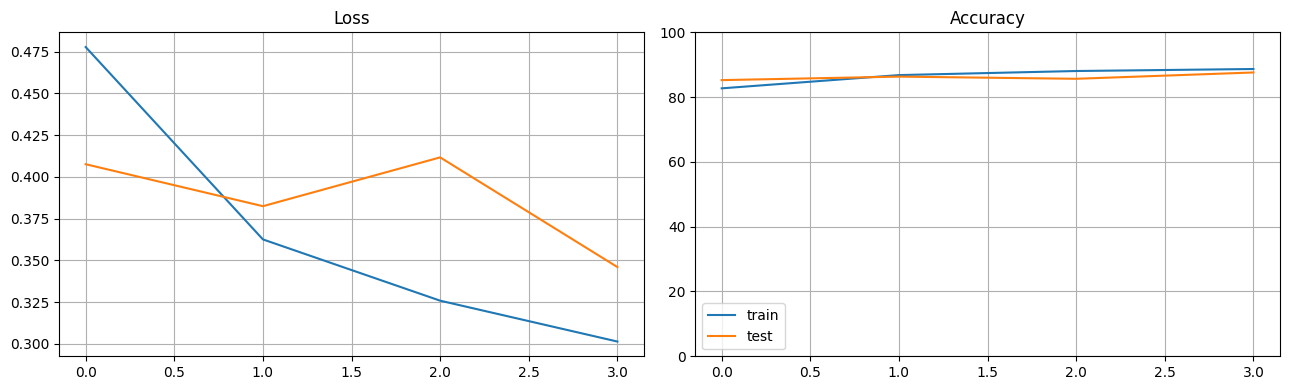

40/40 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      1000
           1       1.00      0.96      0.98      1000
           2       0.73      0.85      0.78      1000
           3       0.82      0.94      0.88      1000
           4       0.82      0.71      0.76      1000
           5       0.97      0.95      0.96      1000
           6       0.78      0.59      0.67      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



In [20]:
model_report(model_relu_adam, 4)

In [ ]:
model_relu_adam.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_95 (Dense)            (None, 1024)              803840    
                                                                 
 dense_96 (Dense)            (None, 512)               524800    
                                                                 
 dense_97 (Dense)            (None, 128)               65664     
                                                                 
 dense_98 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1395594 (5.32 MB)
Trainable params: 1395594 (5.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_relu_adam_1 = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_relu_adam_1.compile(
    optimizer=optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 42s 22ms/step - loss: 0.4782 - sparse_categorical_accuracy: 0.8258 - val_loss: 0.3972 - val_sparse_categorical_accuracy: 0.8553
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3617 - sparse_categorical_accuracy: 0.8681 - val_loss: 0.3842 - val_sparse_categorical_accuracy: 0.8604
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3231 - sparse_categorical_accuracy: 0.8805 - val_loss: 0.3633 - val_sparse_categorical_accuracy: 0.8647
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2983 - sparse_categorical_accuracy: 0.8888 - val_loss: 0.3547 - val_sparse_categorical_accuracy: 0.8764
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2827 - sparse_categorical_accuracy: 0.8947 - val_loss: 0.3584 - val_sparse_categorical_accuracy: 0.8801
Epoch 6/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2683 - spar

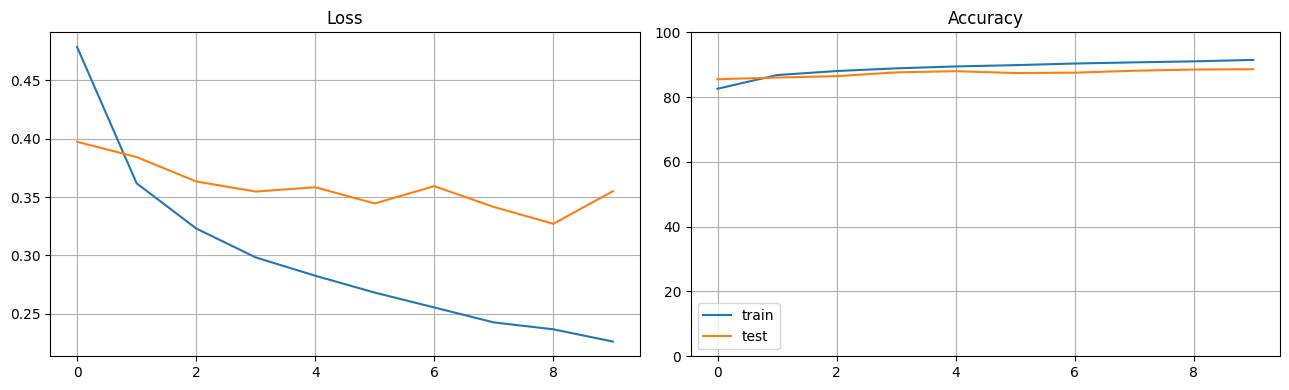

40/40 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.74      0.86      0.80      1000
           3       0.90      0.86      0.88      1000
           4       0.80      0.78      0.79      1000
           5       0.99      0.96      0.97      1000
           6       0.77      0.65      0.70      1000
           7       0.93      0.98      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
model_report(model_relu_adam_1, 10)

In [ ]:
model_relu_RMSprop = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_relu_RMSprop.compile(
    optimizer=optimizers.RMSprop(learning_rate=learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 41s 21ms/step - loss: 0.5224 - sparse_categorical_accuracy: 0.8102 - val_loss: 0.4161 - val_sparse_categorical_accuracy: 0.8456
Epoch 2/4
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4080 - sparse_categorical_accuracy: 0.8571 - val_loss: 0.4152 - val_sparse_categorical_accuracy: 0.8607
Epoch 3/4
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3930 - sparse_categorical_accuracy: 0.8657 - val_loss: 0.4208 - val_sparse_categorical_accuracy: 0.8594
Epoch 4/4
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3894 - sparse_categorical_accuracy: 0.8681 - val_loss: 0.4231 - val_sparse_categorical_accuracy: 0.8656


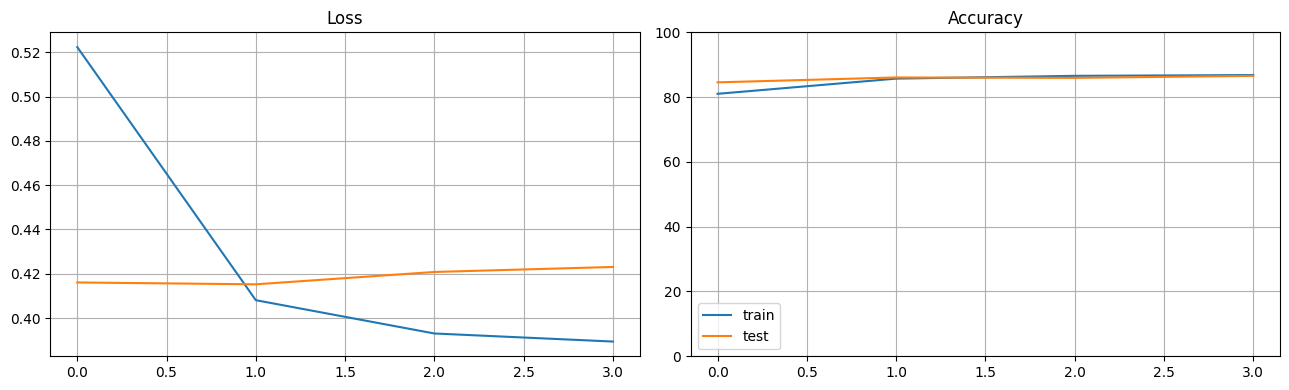

40/40 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.74      0.80      0.77      1000
           3       0.86      0.89      0.87      1000
           4       0.80      0.74      0.77      1000
           5       0.98      0.91      0.95      1000
           6       0.68      0.67      0.68      1000
           7       0.86      0.98      0.92      1000
           8       0.95      0.96      0.96      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
model_report(model_relu_RMSprop, 4)

In [ ]:
model_relu_RMSprop.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 784)               0         
                                                                 
 dense_99 (Dense)            (None, 1024)              803840    
                                                                 
 dense_100 (Dense)           (None, 512)               524800    
                                                                 
 dense_101 (Dense)           (None, 128)               65664     
                                                                 
 dense_102 (Dense)           (None, 10)                1290      
                                                                 
Total params: 1395594 (5.32 MB)
Trainable params: 1395594 (5.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_relu_SGD = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_relu_SGD.compile(
    optimizer=optimizers.SGD(learning_rate=learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 35s 18ms/step - loss: 1.2761 - sparse_categorical_accuracy: 0.6351 - val_loss: 0.8538 - val_sparse_categorical_accuracy: 0.7331
Epoch 2/4
1875/1875 [==============================] - 29s 16ms/step - loss: 0.7378 - sparse_categorical_accuracy: 0.7693 - val_loss: 0.6800 - val_sparse_categorical_accuracy: 0.7771
Epoch 3/4
1875/1875 [==============================] - 29s 15ms/step - loss: 0.6220 - sparse_categorical_accuracy: 0.7999 - val_loss: 0.6039 - val_sparse_categorical_accuracy: 0.8001
Epoch 4/4
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5625 - sparse_categorical_accuracy: 0.8140 - val_loss: 0.5617 - val_sparse_categorical_accuracy: 0.8084


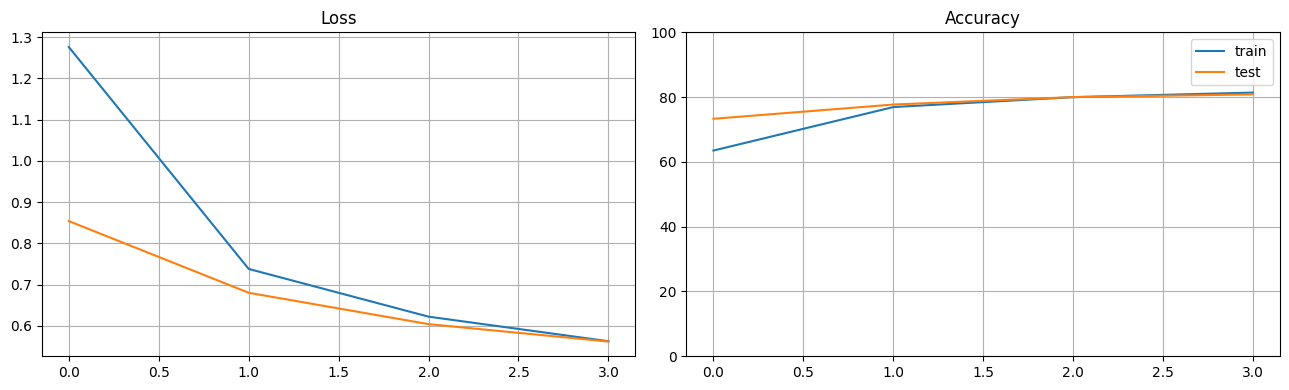

40/40 [==============================] - 1s 15ms/step
              precision    recall  f1-score   support

           0       0.74      0.82      0.77      1000
           1       0.97      0.93      0.95      1000
           2       0.70      0.69      0.69      1000
           3       0.76      0.88      0.81      1000
           4       0.71      0.71      0.71      1000
           5       0.94      0.87      0.90      1000
           6       0.59      0.45      0.51      1000
           7       0.87      0.88      0.87      1000
           8       0.90      0.94      0.92      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



In [ ]:
model_report(model_relu_SGD, 4)

In [ ]:
model_relu_SGD.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_103 (Dense)           (None, 1024)              803840    
                                                                 
 dense_104 (Dense)           (None, 512)               524800    
                                                                 
 dense_105 (Dense)           (None, 128)               65664     
                                                                 
 dense_106 (Dense)           (None, 10)                1290      
                                                                 
Total params: 1395594 (5.32 MB)
Trainable params: 1395594 (5.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Найкраще себе показав оптимізатор Adam та функція relu, тож підбирала параметри саме з ними.

In [ ]:
model_relu_Adam_2 = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(1024, activation='relu'),
    Dropout(0.25),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_relu_Adam_2.compile(
    optimizer=optimizers.Adam(learning_rate=0.002),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 51s 26ms/step - loss: 0.5351 - sparse_categorical_accuracy: 0.8023 - val_loss: 0.4699 - val_sparse_categorical_accuracy: 0.8286
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4251 - sparse_categorical_accuracy: 0.8460 - val_loss: 0.3876 - val_sparse_categorical_accuracy: 0.8605
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3919 - sparse_categorical_accuracy: 0.8581 - val_loss: 0.3943 - val_sparse_categorical_accuracy: 0.8550
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3681 - sparse_categorical_accuracy: 0.8655 - val_loss: 0.3802 - val_sparse_categorical_accuracy: 0.8628
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3543 - sparse_categorical_accuracy: 0.8695 - val_loss: 0.3689 - val_sparse_categorical_accuracy: 0.8700
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3448 - spar

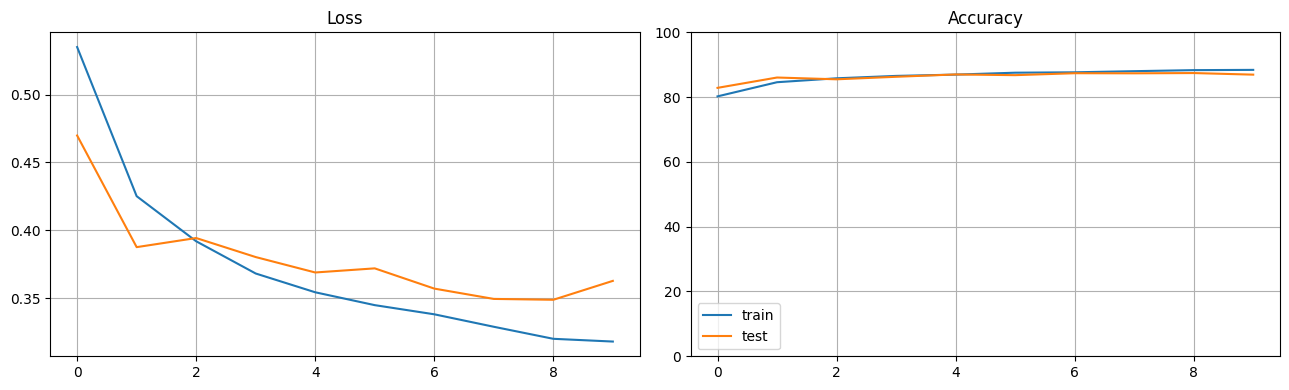

20/20 [==============================] - 1s 27ms/step
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1000
           1       0.97      0.96      0.96      1000
           2       0.76      0.78      0.77      1000
           3       0.85      0.89      0.87      1000
           4       0.71      0.86      0.78      1000
           5       0.96      0.97      0.96      1000
           6       0.77      0.51      0.62      1000
           7       0.95      0.94      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
model_report(model_relu_Adam_2, 10, 512)

In [ ]:
model_relu_Adam_2.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_115 (Dense)           (None, 1024)              803840    
                                                                 
 dropout_11 (Dropout)        (None, 1024)              0         
                                                                 
 dense_116 (Dense)           (None, 512)               524800    
                                                                 
 dense_117 (Dense)           (None, 128)               65664     
                                                                 
 dense_118 (Dense)           (None, 10)                1290      
                                                                 
Total params: 1395594 (5.32 MB)
Trainable params: 139

In [ ]:
model_relu_Adam_3 = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_relu_Adam_3.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 38s 20ms/step - loss: 0.5599 - sparse_categorical_accuracy: 0.8008 - val_loss: 0.4436 - val_sparse_categorical_accuracy: 0.8291
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4071 - sparse_categorical_accuracy: 0.8521 - val_loss: 0.3834 - val_sparse_categorical_accuracy: 0.8623
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3720 - sparse_categorical_accuracy: 0.8640 - val_loss: 0.3761 - val_sparse_categorical_accuracy: 0.8682
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3495 - sparse_categorical_accuracy: 0.8731 - val_loss: 0.3935 - val_sparse_categorical_accuracy: 0.8592
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3350 - sparse_categorical_accuracy: 0.8788 - val_loss: 0.3614 - val_sparse_categorical_accuracy: 0.8705
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3219 - spar

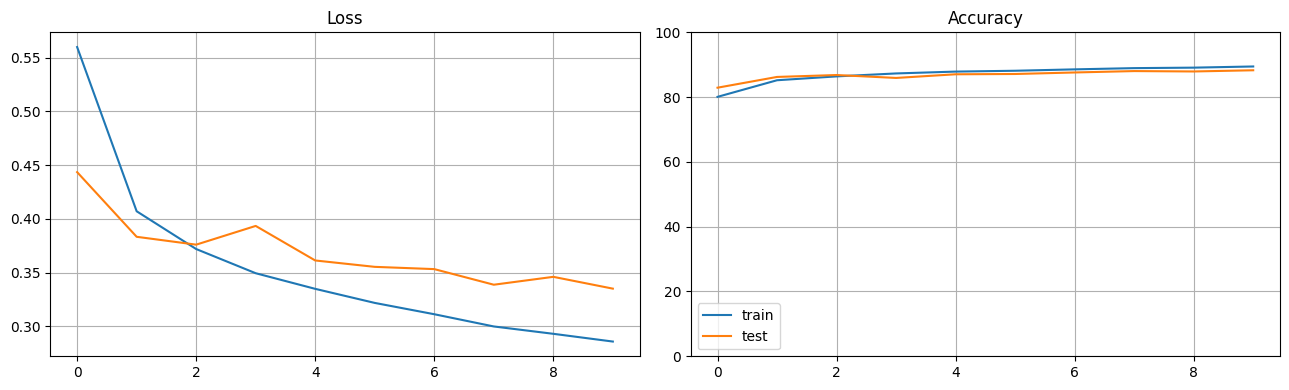

40/40 [==============================] - 1s 12ms/step
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.77      0.79      0.78      1000
           3       0.90      0.89      0.89      1000
           4       0.78      0.82      0.80      1000
           5       0.98      0.94      0.96      1000
           6       0.74      0.65      0.69      1000
           7       0.92      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
model_report(model_relu_Adam_3, 10)

In [ ]:
model_relu_Adam_3.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 784)               0         
                                                                 
 dense_119 (Dense)           (None, 512)               401920    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_120 (Dense)           (None, 1024)              525312    
                                                                 
 dropout_13 (Dropout)        (None, 1024)              0         
                                                                 
 dense_121 (Dense)           (None, 128)               131200    
                                                                 
 dense_122 (Dense)           (None, 16)              

In [ ]:
model_relu_Adam_4 = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_relu_Adam_4.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 21s 10ms/step - loss: 0.5506 - sparse_categorical_accuracy: 0.8011 - val_loss: 0.4292 - val_sparse_categorical_accuracy: 0.8439
Epoch 2/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4161 - sparse_categorical_accuracy: 0.8472 - val_loss: 0.4057 - val_sparse_categorical_accuracy: 0.8547
Epoch 3/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3835 - sparse_categorical_accuracy: 0.8584 - val_loss: 0.3708 - val_sparse_categorical_accuracy: 0.8683
Epoch 4/15
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3612 - sparse_categorical_accuracy: 0.8666 - val_loss: 0.3655 - val_sparse_categorical_accuracy: 0.8689
Epoch 5/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3461 - sparse_categorical_accuracy: 0.8723 - val_loss: 0.3553 - val_sparse_categorical_accuracy: 0.8704
Epoch 6/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3306 - sparse

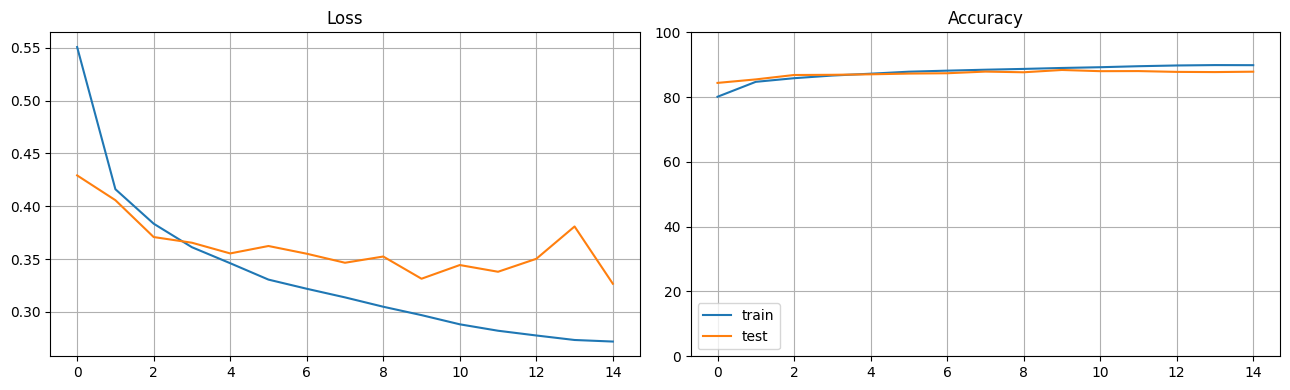

20/20 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.75      0.92      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.86      0.80      1000
           3       0.86      0.93      0.89      1000
           4       0.81      0.75      0.78      1000
           5       0.99      0.95      0.97      1000
           6       0.82      0.50      0.62      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



In [ ]:
model_report(model_relu_Adam_4, 15, 512)

In [ ]:
model_relu_Adam_4.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_30 (Flatten)        (None, 784)               0         
                                                                 
 dense_124 (Dense)           (None, 256)               200960    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_125 (Dense)           (None, 512)               131584    
                                                                 
 dropout_15 (Dropout)        (None, 512)               0         
                                                                 
 dense_126 (Dense)           (None, 256)               131328    
                                                                 
 dense_127 (Dense)           (None, 16)              

In [144]:
model_relu_Adam_5 = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model_relu_Adam_5.compile(
    optimizer=optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


235/235 [==============================] - 7s 25ms/step - loss: 0.6368 - sparse_categorical_accuracy: 0.7712 - val_loss: 0.4409 - val_sparse_categorical_accuracy: 0.8409
Epoch 2/40
235/235 [==============================] - 6s 27ms/step - loss: 0.4134 - sparse_categorical_accuracy: 0.8501 - val_loss: 0.4038 - val_sparse_categorical_accuracy: 0.8505
Epoch 3/40
235/235 [==============================] - 5s 22ms/step - loss: 0.3729 - sparse_categorical_accuracy: 0.8649 - val_loss: 0.3960 - val_sparse_categorical_accuracy: 0.8552
Epoch 4/40
235/235 [==============================] - 7s 28ms/step - loss: 0.3494 - sparse_categorical_accuracy: 0.8722 - val_loss: 0.3594 - val_sparse_categorical_accuracy: 0.8678
Epoch 5/40
235/235 [==============================] - 5s 22ms/step - loss: 0.3315 - sparse_categorical_accuracy: 0.8791 - val_loss: 0.3466 - val_sparse_categorical_accuracy: 0.8747
Epoch 6/40
235/235 [==============================] - 6s 26ms/step - loss: 0.3170 - sparse_categorical_acc

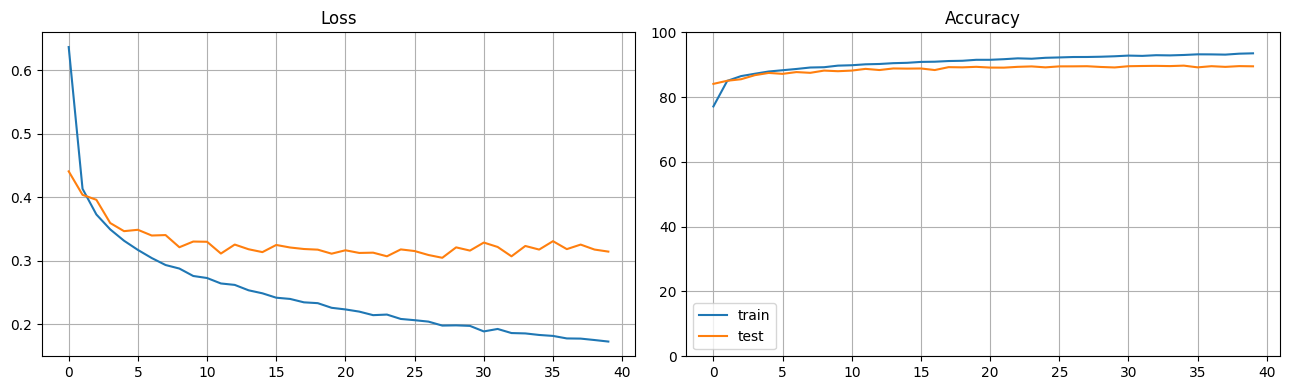

40/40 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.79      0.84      0.81      1000
           3       0.92      0.89      0.90      1000
           4       0.78      0.85      0.81      1000
           5       0.99      0.96      0.97      1000
           6       0.79      0.65      0.71      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [145]:
model_report(model_relu_Adam_5, 40, 256)

In [146]:
model_relu_Adam_5.save("model_relu_Adam")
model = tf.keras.models.load_model("model_relu_Adam")
model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_54 (Flatten)        (None, 784)               0         
                                                                 
 dense_241 (Dense)           (None, 512)               401920    
                                                                 
 dropout_145 (Dropout)       (None, 512)               0         
                                                                 
 dense_242 (Dense)           (None, 256)               131328    
                                                                 
 dropout_146 (Dropout)       (None, 256)               0         
                                                                 
 dense_243 (Dense)           (None, 128)               32896     
                                                                 
 dropout_147 (Dropout)       (None, 128)             

40/40 [==============================] - 0s 8ms/step


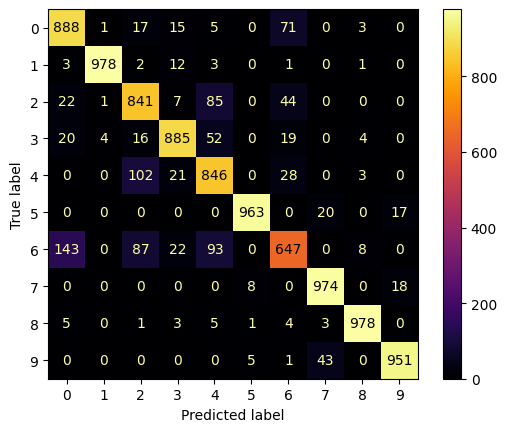

In [147]:
from sklearn.metrics import ConfusionMatrixDisplay
test_pred = model.predict(x_test, batch_size=batch_size, use_multiprocessing=True)
test_pred_values = tf.math.argmax(test_pred, axis=1)
ConfusionMatrixDisplay.from_predictions(y_test, test_pred_values, cmap='inferno')
plt.show()

Точність моделі становить 90%, найгірше визначае номер 6 f1-score 71%.   
Використана функція активації "relu" та оптимізатор "Adam"   
batch_size = 256   
learning_rate = 0.001